# Deep Learning  KDDcup 99


In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import sys
import tarfile
import tensorflow as tf
from IPython.display import display, Image
from scipy import ndimage
from sklearn.linear_model import LogisticRegression
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

import csv
from array import *
from collections import Counter

    
        

In [2]:
with open('/home/isl-eyup/tensorflow/KDDcup_datasets/kddcup_data_corrected_uniq.csv', 'rb') as f:
    reader = csv.reader(f)
    data_as_list = list(reader)
def file_len(adress):
  f = open(adress)
  nr_of_lines = sum(1 for line in f)
  f.close()
  return nr_of_lines

number_of_lines = file_len('/home/isl-eyup/tensorflow/KDDcup_datasets/kddcup_data_corrected_uniq.csv')
print('Toplam satir sayisi : ', number_of_lines)



def label_index(str):
    indx = 4
    if str == 'back.':
        indx = 0
    elif str == 'buffer_overflow.':
        indx = 1
    elif str =='ftp_write.':
        indx = 2
    elif str == 'guess_password.':
        indx = 2
    elif str == 'imap.':
        indx = 2
    elif str == 'ipsweep.':
        indx = 3
    elif str == 'land.':
        indx = 0
    elif str == 'loadmodule.':
        indx = 1
    elif str == 'multihop.':
        indx = 0
    elif str == 'neptune.':
        indx = 0
    elif str == 'nmap.':
        indx = 3
    elif str == 'normal.':
        indx = 4
    elif str == 'perl.':
        indx = 1
    elif str =='phf.':
        indx = 2
    elif str == 'pod.':
        indx = 0
    elif str == 'portsweep.':
        indx = 3
    elif str == 'rootkit.':
        indx = 1
    elif str == 'satan.':
        indx = 3
    elif str == 'smurf.':
        indx = 0
    elif str == 'spy.':
        indx = 2
    elif str == 'teardrop.':
        indx = 0
    elif str == 'warezclient.':
        indx == 2
    elif str == 'warezmaster.':
        indx = 2
    else :
        indx = 4
    return indx
    
    
attack_types = ['dos','u2r','r2l','probe','normal']    
print("Classes are : ",attack_types)

Toplam satir sayisi :  1074992
Classes are :  ['dos', 'u2r', 'r2l', 'probe', 'normal']


In [4]:
#LABEL ARRAY 
#label_array = np.empty(number_of_lines, dtype=object)
#attack_matrix = np.ndarray(shape=(number_of_lines,5), dtype='int')

#for i in range(number_of_lines):
#    for j in range(5):
#        attack_matrix[i][j]=0

#FROM LABEL TO ATTACK MATRIX        
#for i in range(number_of_lines):
#    label_array[i] = data_as_list[i][41] 
#    attack_matrix[i][label_index(label_array[i])] = 1


In [3]:
"""Protocols : ['icmp', 'tcp', 'udp']"""
def protocol_index(str):
    indx = 0
    if str == 'icmp':
        indx = 0
    elif str == 'tcp':
        indx = 1
    elif str =='udp':
        indx = 2
    return indx

"""FLAGS : ['SF', 'REJ', 'RSTO', 'RSTR', 'S0', 'SH', 'S1', 'OTH', 'S2', 'S3', 'RSTOS0']"""
def flag_index(str):
    indx = 0
    if str == 'SF':
        indx = 0
    elif str == 'REJ':
        indx = 1
    elif str =='RSTO':
        indx = 2
    elif str == 'RSTR':
        indx = 3
    elif str == 'S0':
        indx = 4
    elif str == 'SH':
        indx = 5
    elif str == 'S1':
        indx = 6
    elif str == 'OTH':
        indx = 7
    elif str == 'S2':
        indx = 8
    elif str == 'S3':
        indx = 9
    elif str == 'nmap.':
        indx = 10
    elif str == 'RSTOS0':
        indx = 11
    return indx


"""THERE ARE 70 SERVICES """
def service_index(str):
    indx = 0
    if str == 'eco_i':
        indx = 0
    elif str == 'ecr_i':
        indx = 1
    elif str =='red_i':
        indx = 2
    elif str == 'tim_i':
        indx = 3
    elif str == 'urh_i':
        indx = 4
    elif str == 'urp_i':
        indx = 5
    elif str == 'aol':
        indx = 6
    elif str == 'auth':
        indx = 7
    elif str == 'bgp':
        indx = 8
    elif str == 'courier':
        indx = 9
    elif str == 'csnet_ns':
        indx = 10
    elif str == 'ctf':
        indx = 11
    elif str == 'daytime':
        indx = 12
    elif str == 'discard':
        indx = 13
    elif str == 'domain':
        indx = 14
    elif str == 'echo':
        indx = 15
    elif str == 'efs':
        indx = 16
    elif str == 'exec':
        indx = 17
    elif str == 'finger':
        indx = 18
    elif str == 'ftp_data':
        indx = 19
    elif str == 'ftp':
        indx = 20
    elif str == 'gopher':
        indx = 21
    elif str == 'harvest':
        indx = 22
    elif str == 'hostnames':
        indx = 23
    elif str == 'http_2784':
        indx = 24
    elif str == 'http_443':
        indx = 25
    elif str == 'http_8001':
        indx = 26
    elif str == 'http':
        indx = 27
    elif str == 'imap4':
        indx = 28
    elif str == 'IRC':
        indx = 29
    elif str == 'iso_tsap':
        indx = 30
    elif str == 'klogin':
        indx = 31
    elif str == 'kshell':
        indx = 32        
    elif str == 'ldap':
        indx = 33
    elif str == 'link':
        indx = 34
    elif str == 'login':
        indx = 35
    elif str == 'mtp':
        indx = 36
    elif str == 'name':
        indx = 37
    elif str == 'netbios_dgm':
        indx = 38
    elif str == 'netbios_ns':
        indx = 39
    elif str == 'netbios_ssn':
        indx = 40
    elif str == 'netstat':
        indx = 41
    elif str == 'nnsp':
        indx = 42
    elif str == 'nntp':
        indx = 43
    elif str == 'other':
        indx = 44
    elif str == 'pm_dump':
        indx = 45
    elif str == 'pop_2':
        indx = 46
    elif str == 'pop_3':
        indx = 47
    elif str == 'printer':
        indx = 48
    elif str == 'private':
        indx = 49
    elif str == 'remote_job':
        indx = 50
    elif str == 'rje':
        indx = 51
    elif str == 'shell':
        indx = 52
    elif str == 'smtp':
        indx = 53
    elif str == 'sql_net':
        indx = 54
    elif str == 'ssh':
        indx = 55
    elif str == 'sunrpc':
        indx = 56
    elif str == 'supdup':
        indx = 57
    elif str == 'systat':
        indx = 58
    elif str == 'telnet':
        indx = 59
    elif str == 'time':
        indx = 60
    elif str == 'uucp_path':
        indx = 61
    elif str == 'uucp':
        indx = 62
    elif str == 'vmnet':
        indx = 63
    elif str == 'whois':
        indx = 64
    elif str == 'X11':
        indx = 65
    elif str == 'Z39_50':
        indx = 66
    elif str == 'domain_u':
        indx = 67
    elif str == 'ntp_u':
        indx = 68
    elif str == 'tftp_u':
        indx = 69
    return indx



In [6]:
protocol = []
sayac =0


for i in range(number_of_lines):
    if data_as_list[i][1] in protocol:
        sayac = sayac
    else:
        protocol.append(data_as_list[i][1]) 
        sayac += 1
print("There are %d protocol types " %sayac)
print("Protocols : %s" %protocol)


service = []
sayac =0
for i in range(number_of_lines):
    if data_as_list[i][2] in service:
        sayac = sayac
    else:
        service.append(data_as_list[i][2])
        sayac += 1
print("There are %d service " %sayac)   
print("Services : %s" %service)



flag = []
sayac =0
for i in range(number_of_lines):
    if data_as_list[i][3] in flag:
        sayac = sayac
    else:
        flag.append(data_as_list[i][3])
        sayac += 1
print("There are %d flag " %sayac)     
print("Flags : %s" %flag)

There are 3 protocol types 
Protocols : ['icmp', 'tcp', 'udp']
There are 70 service 
Services : ['eco_i', 'ecr_i', 'red_i', 'tim_i', 'urh_i', 'urp_i', 'aol', 'auth', 'bgp', 'courier', 'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'echo', 'efs', 'exec', 'finger', 'ftp_data', 'ftp', 'gopher', 'harvest', 'hostnames', 'http_2784', 'http_443', 'http_8001', 'http', 'imap4', 'IRC', 'iso_tsap', 'klogin', 'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'time', 'uucp_path', 'uucp', 'vmnet', 'whois', 'X11', 'Z39_50', 'domain_u', 'ntp_u', 'tftp_u']
There are 11 flag 
Flags : ['SF', 'REJ', 'RSTO', 'RSTR', 'S0', 'SH', 'S1', 'OTH', 'S2', 'S3', 'RSTOS0']


In [7]:
attack_types[label_index(data_as_list[1][41])]

'probe'

In [8]:
data_uniq = np.empty(shape=[number_of_lines, 42])
label_array = np.empty(number_of_lines, dtype=object)

for i in range(number_of_lines):
    label_array[i] = attack_types[label_index(data_as_list[i][41])]
print("Label Array generated ")

for i in range(number_of_lines):
    data_uniq[i][0] = data_as_list[i][0]
    data_uniq[i][1] = protocol_index(data_as_list[i][1])
    data_uniq[i][2] = service_index(data_as_list[i][2])
    data_uniq[i][3] = flag_index(data_as_list[i][3])
print("Protocol, service and flag names change with int value ")        
        
for i in range(number_of_lines):
    for j in range(4,41):
        data_uniq[i][j] = data_as_list[i][j]


for i in range(number_of_lines):
    data_uniq[i][41] = attack_types.index(label_array[i])

print("Dataset reorganize as data_uniq ... ")    


Label Array generated 
Protocol, service and flag names change with int value 
Dataset reorganize as data_uniq ... 


In [78]:
#"""Array save to csv file """
#np.savetxt(
#    'Dataset_uniq_corrected.csv', # file name
#    data_uniq,              # array to save
#    fmt='%.5f',             # formatting, 2 digits in this case
#    delimiter=',',          # column delimiter
#    newline='\n',           # new line character
#    footer='end of file',   # file footer
#    comments='# ',          # character to use for comments
#    header='Data generated by numpy')      # file header

In [9]:
from sklearn.utils import shuffle
data = np.empty(shape=[300000, 42], dtype = float)
data = data_uniq[:300000][:].astype(float)

data = shuffle(data)
print("Data shuffled ! ")
print(data.shape, data.dtype)



Data shuffled ! 
(300000, 42) float64


In [10]:
sayac = np.zeros(5, dtype=int)
for i in range(300000):
    sayac[data[i][41]] +=  1
    
for i in range(5):
    print('Size of data set for class ' + str(i) + ': ' + str(sayac[i]))

    


/home/isl-eyup/.local/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


Size of data set for class 0: 23501
Size of data set for class 1: 12
Size of data set for class 2: 7
Size of data set for class 3: 4547
Size of data set for class 4: 271933


In [39]:
#new_data_uniq = np.empty(shape=[300000, 42], dtype = int)
#say1 = 0
#say2 = 0 

#for i in range(number_of_lines):
#    for j in range(42):
#        if say2 < 300000:
#            if data[i][41] == 9 :
#                if say1 < 35000:
#                    new_data_uniq[say2][j] = data[i][j]
#                    say1 += 1
#            elif data[i][41] == 11 :
#                if say2 < 300000:
#                    new_data_uniq[say2][j] = data[i][j]
#            else:
#                new_data_uniq[say2][j] = data[i][j]
#    say2 +=1
#print(new_data_uniq.shape)    

(300000, 42)


In [41]:
#sayac = np.zeros(5, dtype=int)
#for i in range(300000):
#    sayac[new_data_uniq[i][41]] +=  1
#    
#for i in range(5):
#    print('number of insance for class ' + str(i) + ': ' + str(sayac[i]))

number of insance for class 0: 1110
number of insance for class 1: 28
number of insance for class 2: 14
number of insance for class 3: 0
number of insance for class 4: 0
number of insance for class 5: 43823
number of insance for class 6: 65
number of insance for class 7: 0
number of insance for class 8: 4
number of insance for class 9: 9621
number of insance for class 10: 11096
number of insance for class 11: 208264
number of insance for class 12: 0
number of insance for class 13: 0
number of insance for class 14: 1502
number of insance for class 15: 542
number of insance for class 16: 3
number of insance for class 17: 646
number of insance for class 18: 23276
number of insance for class 19: 0
number of insance for class 20: 0
number of insance for class 21: 0
number of insance for class 22: 6


2.0


In [12]:
"""Dataset: data_uniq matrix --> data matrix """
"""Train_set : 80% of dataset """
"""Test set : 10 % of dataset """

dataset = np.empty(shape=[300000, 42], dtype = float)
for i in range(300000):
    for j in range(42):
        dataset[i][j] = int(data[i][j])

dataset = np.float32(dataset)  

train_dataset = np.empty(shape=[240000, 42] ,dtype = float)
train_dataset = np.float32(train_dataset)
train_labels = np.empty(shape=[240000] ,dtype = float)
train_labels = np.float32(train_labels)
test_dataset = np.empty(shape=[30000, 42] ,dtype = float)
test_dataset = np.float32(test_dataset)
test_labels = np.empty(shape=[30000] ,dtype = float)
test_labels = np.float32(test_labels)
valid_dataset = np.empty(shape=[30000, 42] ,dtype = float)
valid_dataset = np.float32(valid_dataset)
valid_labels = np.empty(shape=[30000] ,dtype = float)
valid_labels = np.float32(valid_labels)
print("Done ! ")



Done ! 


In [13]:
train_set.dtype

dtype('float32')

In [24]:
for i in range(240000):
    for j in range(42):
        train_dataset[i][j] = int(dataset[i][j])
print("Train dataset created . . ", train_dataset.shape, train_dataset.dtype)
        
k = 0
for i in range(240000,270000):
    l = 0
    for j in range(42):
        test_dataset[k][l] = int(dataset[i][j])
        l +=1
    k+=1    
print("Test dataset created . . ", test_dataset.shape, test_dataset.dtype)
    
k = 0
for i in range(270000,300000):
    l = 0
    for j in range(42):
        valid_dataset[k][l] = int(dataset[i][j])
        l +=1
    k +=1
print("Validation dataset created . . ", valid_dataset.shape, valid_dataset.dtype)
   
print("Done ! ")


Train dataset created . .  (240000, 42) float32
Test dataset created . .  (30000, 42) float32
Validation dataset created . .  (30000, 42) float32
Done ! 


In [25]:
for i in range(240000):
    train_labels[i] = dataset[i][41]
print("training labels array created :   ", train_labels.shape, train_labels.dtype) 

k=0    
for i in range(240000,270000):
    test_labels[k] = dataset[i][41]    
    k += 1
print("test labels array created :  ", test_labels.shape, test_labels.dtype)

m=0    
for i in range(270000,300000):
    valid_labels[m] = dataset[i][41]
    m += 1
print("validation labels array created :  ", valid_labels.shape, valid_labels.dtype)

print("Done ! ")

training labels array created :    (240000,) float32
test labels array created :   (30000,) float32
validation labels array created :   (30000,) float32
Done ! 


In [26]:
sayac = np.zeros(5, dtype=int)
for i in range(300000):
    sayac[dataset[i][41]] +=  1
    
for i in range(5):
    print('number of insance for class ' + str(i) + ': ' + str(sayac[i]))

/home/isl-eyup/.local/lib/python2.7/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


number of insance for class 0: 23501
number of insance for class 1: 12
number of insance for class 2: 7
number of insance for class 3: 4547
number of insance for class 4: 271933


In [27]:
print('Full dataset tensor:', dataset.shape)

"""Mean & Standart deviation of columns """
print("Means of each columns  : ")
print(dataset.mean(0))
print("Standart deviations of each columns : ")
print(dataset.std(0))

Full dataset tensor: (300000, 42)
Means of each columns  : 
[  0.00000000e+00   9.60309982e-01   2.39767303e+01   3.80233347e-01
   1.10602747e+03   3.11069556e+03   8.33333324e-05   6.76666677e-04
   0.00000000e+00   1.05799995e-02   1.33333333e-05   7.26830006e-01
   6.46666682e-04   8.33333324e-05   0.00000000e+00   8.00933316e-02
   2.97666667e-03   1.10999995e-03   9.80000012e-04   0.00000000e+00
   0.00000000e+00   2.93333345e-04   2.33072243e+01   1.38064270e+01
   5.57533316e-02   5.55966683e-02   1.31770000e-01   1.28623337e-01
   9.17853355e-01   5.24333352e-03   5.63500002e-02   1.17942123e+02
   1.92000473e+02   7.56556690e-01   6.93333335e-04   5.21466658e-02
   1.21999998e-03   5.53233325e-02   5.51900007e-02   1.12669997e-01
   6.75633326e-02   3.67132998e+00]
Standart deviations of each columns : 
[  0.00000000e+00   1.95346206e-01   6.23409891e+00   1.00121713e+00
   1.48577246e+04   8.53244629e+03   9.12795588e-03   2.59956066e-02
   0.00000000e+00   4.49686199e-01   

In [28]:
          
train_size = len(train_dataset)
test_size = len(test_dataset)
valid_size = len(valid_dataset)


print('Training:', train_dataset.shape)
print('Validation:', valid_dataset.shape)
print('Testing:', test_dataset.shape)







Training: (240000, 42)
Validation: (30000, 42)
Testing: (30000, 42)


In [29]:
#lets use md5 hasing to measure the overlap between something
from hashlib import md5
#prepare image hashes
%time set_valid_dataset = set([ md5(x).hexdigest() for x in valid_dataset])
%time set_test_dataset = set([ md5(x).hexdigest() for x in test_dataset])
%time set_train_dataset = set([ md5(x).hexdigest() for x in train_dataset])

#measure overlaps and print them
overlap_test_valid = set_test_dataset - set_valid_dataset
print('overlap test valid: ' + str(len(overlap_test_valid)))

overlap_train_valid = set_train_dataset - set_valid_dataset
print ('overlap train valid: ' + str(len(overlap_train_valid)))

overlap_train_test = set_train_dataset - set_test_dataset
print ('overlap train test: ' + str(len(overlap_train_test)))
print('done')



CPU times: user 96 ms, sys: 8 ms, total: 104 ms
Wall time: 96.4 ms
CPU times: user 100 ms, sys: 12 ms, total: 112 ms
Wall time: 102 ms
CPU times: user 516 ms, sys: 32 ms, total: 548 ms
Wall time: 509 ms
overlap test valid: 28197
overlap train valid: 218207
overlap train test: 218174
done


In [21]:
data.dtype

dtype('float64')

In [30]:
#en başta tanımladığımız LogisticRegression u kullanacağız
logReg = LogisticRegression();

fittedmodel = logReg.fit(train_dataset,train_labels)         
test_score = logReg.score(test_dataset,test_labels)

print(test_score)
print("Done !")

0.9988
Done !


array([[  0.,   1.,  27., ...,   1.,   1.,   4.],
       [  0.,   1.,  27., ...,   0.,   0.,   4.],
       [  0.,   1.,  27., ...,   0.,   0.,   4.],
       ..., 
       [  0.,   1.,  27., ...,   0.,   0.,   4.],
       [  0.,   1.,  27., ...,   0.,   0.,   4.],
       [  0.,   1.,  27., ...,   0.,   0.,   4.]])

In [179]:
biases.dtype

tf.float32_ref

In [31]:
data_size = 42
num_labels = 5

def reformat(dataset, labels):
  dataset = dataset.reshape((-1, data_size)).astype(np.float32)
  # Map 0 to [1.0, 0.0, 0.0 ...], 1 to [0.0, 1.0, 0.0 ...]
  labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
  return dataset, labels
train_dataset, train_labels = reformat(train_set, train_labels)
valid_dataset, valid_labels = reformat(valid_set, valid_labels)
test_dataset, test_labels = reformat(test_set, test_labels)
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (240000, 42) (240000, 5)
Validation set (30000, 42) (30000, 5)
Test set (30000, 42) (30000, 5)


<bound method Tensor.get_shape of <tf.Tensor 'Const:0' shape=(10000, 42) dtype=float32>>
<bound method Tensor.get_shape of <tf.Tensor 'Const_1:0' shape=(10000,) dtype=float32>>
<bound method Tensor.get_shape of <tf.Tensor 'Const_2:0' shape=(30000, 42) dtype=float32>>
Tensor("Placeholder_2:0", dtype=float32)


In [32]:
# With gradient descent training, even this much data is prohibitive.
# Subset the training data for faster turnaround.
train_subset = 10000
num_labels = 5
data_size = 42 
graph = tf.Graph()
with graph.as_default():

  # Input data.
  # Load the training, validation and test data into constants that are
  # attached to the graph.
  tf_train_dataset = tf.constant(train_set[:train_subset, :])
  tf_train_labels = tf.constant(train_labels[:train_subset])
  tf_valid_dataset = tf.constant(valid_set)
  tf_test_dataset = tf.constant(test_set)
  beta_regul = tf.placeholder(tf.float32)


  
  # Variables.
  # These are the parameters that we are going to be training. The weight
  # matrix will be initialized using random values following a (truncated)
  # normal distribution. The biases get initialized to zero.
  weights = tf.Variable(
    tf.truncated_normal([data_size, num_labels]))
  biases = tf.Variable(tf.zeros([num_labels]))
  
  # Training computation.
  # We multiply the inputs with the weight matrix, and add biases. We compute
  # the softmax and cross-entropy (it's one operation in TensorFlow, because
  # it's very common, and it can be optimized). We take the average of this
  # cross-entropy across all training examples: that's our loss.
  logits = tf.matmul(tf_train_dataset, weights) + biases
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels)) + beta_regul * tf.nn.l2_loss(weights)
  # Optimizer.
  # We are going to find the minimum of this loss using gradient descent.
  optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  # These are not part of training, but merely here so that we can report
  # accuracy figures as we train.
  train_prediction = tf.nn.softmax(logits)
  valid_prediction = tf.nn.softmax(
    tf.matmul(tf_valid_dataset, weights) + biases)
  test_prediction = tf.nn.softmax(tf.matmul(tf_test_dataset, weights) + biases)

<tf.Tensor 'Placeholder_2:0' shape=<unknown> dtype=float32>

{<tf.Tensor 'Placeholder_2:0' shape=<unknown> dtype=float32>: 0.001}

In [33]:
num_steps = 3001

def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

with tf.Session(graph=graph) as session:
  # This is a one-time operation which ensures the parameters get initialized as
  # we described in the graph: random weights for the matrix, zeros for the
  # biases. 
  tf.initialize_all_variables().run()
  print('Initialized')
  for step in range(num_steps):
    # Run the computations. We tell .run() that we want to run the optimizer,
    # and get the loss value and the training predictions returned as numpy
    # arrays.
    feed_dict = {beta_regul : 1e-3}
    _, l, predictions = session.run([optimizer, loss, train_prediction],feed_dict=feed_dict)
    if (step % 100 == 0):
      print('Loss at step %d: %f' % (step, l))
      print('Training accuracy: %.1f%%' % accuracy(
        predictions, train_labels[:train_subset, :]))
      # Calling .eval() on valid_prediction is basically like calling run(), but
      # just to get that one numpy array. Note that it recomputes all its graph
      # dependencies.
      print('Validation accuracy: %.1f%%' % accuracy(
        valid_prediction.eval(), valid_labels))
  print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels))

Initialized
Loss at step 0: 139.291138
Training accuracy: 76.3%
Validation accuracy: 20.6%
Loss at step 100: 6456.086914
Training accuracy: 94.8%
Validation accuracy: 97.9%
Loss at step 200: 6601.367188
Training accuracy: 97.7%
Validation accuracy: 97.6%
Loss at step 300: 9438.658203
Training accuracy: 97.9%
Validation accuracy: 97.8%
Loss at step 400: 4259.704102
Training accuracy: 96.4%
Validation accuracy: 97.3%
Loss at step 500: 3655.029785
Training accuracy: 98.1%
Validation accuracy: 97.3%
Loss at step 600: 11441.554688
Training accuracy: 97.8%
Validation accuracy: 97.9%
Loss at step 700: 4389.828125
Training accuracy: 98.1%
Validation accuracy: 98.0%
Loss at step 800: 4143.619141
Training accuracy: 98.1%
Validation accuracy: 98.0%
Loss at step 900: 1772.096558
Training accuracy: 98.2%
Validation accuracy: 98.0%
Loss at step 1000: 2488.612061
Training accuracy: 97.9%
Validation accuracy: 97.9%
Loss at step 1100: 1199.324341
Training accuracy: 97.1%
Validation accuracy: 96.7%
Loss

In [34]:
batch_size = 128
num_hidden_nodes = 1024

graph = tf.Graph()
with graph.as_default():

  # Input data. For the training data, we use a placeholder that will be fed
  # at run time with a training minibatch.
  tf_train_dataset = tf.placeholder(tf.float32,
                                    shape=(batch_size, data_size))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(test_dataset)
  beta_regul = tf.placeholder(tf.float32)
# Variables.
  weights1 = tf.Variable(
    tf.truncated_normal([data_size, num_hidden_nodes]))
  biases1 = tf.Variable(tf.zeros([num_hidden_nodes]))
  weights2 = tf.Variable(
    tf.truncated_normal([num_hidden_nodes, num_labels]))
  biases2 = tf.Variable(tf.zeros([num_labels]))
  
  # Training computation.
  lay1_train = tf.nn.relu(tf.matmul(tf_train_dataset, weights1) + biases1)
  logits = tf.matmul(lay1_train, weights2) + biases2
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels)) + \
      beta_regul * (tf.nn.l2_loss(weights1) + tf.nn.l2_loss(weights2))
  
  # Optimizer.
  optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
  
 # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  valid_prediction = tf.nn.softmax(tf.matmul(tf.nn.relu(tf.matmul(tf_valid_dataset, weights1) + biases1), weights2) + biases2) 
  test_prediction = tf.nn.softmax(tf.matmul(tf.nn.relu(tf.matmul(tf_test_dataset, weights1) + biases1), weights2) + biases2)
    

In [119]:
batch_size = 128
num_hidden_nodes = 1024
graph = tf.Graph()
with graph.as_default():

  # Input data. For the training data, we use a placeholder that will be fed
  # at run time with a training minibatch.
  tf_train_dataset = tf.placeholder(tf.float32,
                                    shape=(batch_size, data_size))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(test_dataset)
  beta_regul = tf.placeholder(tf.float32)
  # Variables.
  weights = tf.Variable(
    tf.truncated_normal([data_size, num_hidden_nodes]))
  biases = tf.Variable(tf.zeros([num_hidden_nodes]))
  weights2 = tf.Variable(
    tf.truncated_normal([num_hidden_nodes, num_labels]))
  biases2 = tf.Variable(tf.zeros([num_labels]))
    
  
  # Training computation.
  lay1_train = tf.nn.relu(tf.matmul(tf_train_dataset, weights) + biases)
  logits = tf.matmul(lay1_train, weights2) + biases2
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels)) + \
      beta_regul * (tf.nn.l2_loss(weights) + tf.nn.l2_loss(weights2))
  
  # Optimizer.
  optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  valid_prediction = tf.nn.softmax(tf.matmul(tf.nn.relu(tf.matmul(tf_valid_dataset, weights) + biases), weights2) + biases2) 
  test_prediction = tf.nn.softmax(tf.matmul(tf.nn.relu(tf.matmul(tf_test_dataset, weights) + biases), weights2) + biases2)

In [117]:
beta_regul

<tf.Tensor 'Placeholder_2:0' shape=<unknown> dtype=float32>

In [123]:
feed_dict

{<tf.Tensor 'Placeholder_2:0' shape=<unknown> dtype=float32>: 0.001}

In [35]:
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

In [36]:
num_steps = 3001

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print("Initialized")
  for step in range(num_steps):
    # Pick an offset within the training data, which has been randomized.
    # Note: we could use better randomization across epochs.
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    # Generate a minibatch.
    batch_data = train_dataset[offset:(offset + batch_size), :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    # Prepare a dictionary telling the session where to feed the minibatch.
    # The key of the dictionary is the placeholder node of the graph to be fed,
    # and the value is the numpy array to feed to it.
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels, beta_regul : 1e-3}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 500 == 0):
      print("Minibatch loss at step %d: %f" % (step, l))
      print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
      print("Validation accuracy: %.1f%%" % accuracy(
        valid_prediction.eval(), valid_labels))
  print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))

Initialized
Minibatch loss at step 0: 45124.859375
Minibatch accuracy: 23.4%
Validation accuracy: 90.8%
Minibatch loss at step 500: 196956993279641305177128960.000000
Minibatch accuracy: 31.2%
Validation accuracy: 96.8%
Minibatch loss at step 1000: 119445471782368550565445632.000000
Minibatch accuracy: 91.4%
Validation accuracy: 90.8%
Minibatch loss at step 1500: 72438385564155503846621184.000000
Minibatch accuracy: 93.8%
Validation accuracy: 90.8%
Minibatch loss at step 2000: 43930653533750228385005568.000000
Minibatch accuracy: 85.9%
Validation accuracy: 90.8%
Minibatch loss at step 2500: 26641979912087097923600384.000000
Minibatch accuracy: 85.9%
Validation accuracy: 90.8%
Minibatch loss at step 3000: 16157151493103291172126720.000000
Minibatch accuracy: 92.2%
Validation accuracy: 90.8%
Test accuracy: 90.5%


In [96]:
print(train_labels.shape[0])
print(batch_size)

240000
(240000, 42)
128


In [37]:
num_steps = 3001

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print("Initialized")
  for step in range(num_steps):
    # Pick an offset within the training data, which has been randomized.
    # Note: we could use better randomization across epochs.
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    # Generate a minibatch.
    batch_data = train_set[offset:(offset + batch_size), :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    # Prepare a dictionary telling the session where to feed the minibatch.
    # The key of the dictionary is the placeholder node of the graph to be fed,
    # and the value is the numpy array to feed to it.
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels,beta_regul : 1e-3}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 500 == 0):
      print("Minibatch loss at step %d: %f" % (step, l))
      print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
      print("Validation accuracy: %.1f%%" % accuracy(
        valid_prediction.eval(), valid_labels))
  print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))

Initialized
Minibatch loss at step 0: 12873.699219
Minibatch accuracy: 48.4%
Validation accuracy: 90.8%
Minibatch loss at step 500: 152816671558467584.000000
Minibatch accuracy: 92.2%
Validation accuracy: 90.9%
Minibatch loss at step 1000: 92676417766031360.000000
Minibatch accuracy: 91.4%
Validation accuracy: 90.9%
Minibatch loss at step 1500: 56204070884474880.000000
Minibatch accuracy: 93.8%
Validation accuracy: 90.9%
Minibatch loss at step 2000: 34085214795857920.000000
Minibatch accuracy: 85.9%
Validation accuracy: 90.9%
Minibatch loss at step 2500: 20671134282285056.000000
Minibatch accuracy: 85.9%
Validation accuracy: 90.9%
Minibatch loss at step 3000: 12536116183826432.000000
Minibatch accuracy: 92.2%
Validation accuracy: 90.8%
Test accuracy: 90.5%


In [41]:
num_steps = 3001
regul_val = [pow(10, i) for i in np.arange(-4, -2, 0.1)]
accuracy_val = []

for regul in regul_val:
  with tf.Session(graph=graph) as session:
    tf.initialize_all_variables().run()
    for step in range(num_steps):
    # Pick an offset within the training data, which has been randomized.
    # Note: we could use better randomization across epochs.
      offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    # Generate a minibatch.
      batch_data = train_dataset[offset:(offset + batch_size), :]
      batch_labels = train_labels[offset:(offset + batch_size), :]
    # Prepare a dictionary telling the session where to feed the minibatch.
    # The key of the dictionary is the placeholder node of the graph to be fed,
    # and the value is the numpy array to feed to it.
      feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels, beta_regul : regul}
      _, l, predictions = session.run(
        [optimizer, loss, train_prediction], feed_dict=feed_dict)
    accuracy_val.append(accuracy(test_prediction.eval(), test_labels))

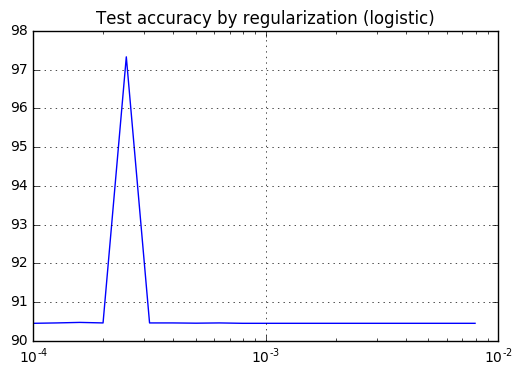

In [42]:
plt.semilogx(regul_val, accuracy_val)
plt.grid(True)
plt.title('Test accuracy by regularization (logistic)')
plt.show()

Let's demonstrate an extreme case of overfitting. Restrict your training data to just a few batches. What happens?
---

In [45]:
batch_size = 128
num_hidden_nodes = 1024

graph = tf.Graph()
with graph.as_default():

  # Input data. For the training data, we use a placeholder that will be fed
  # at run time with a training minibatch.
  tf_train_dataset = tf.placeholder(tf.float32,
                                    shape=(batch_size, data_size))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(test_dataset)
  beta_regul = tf.placeholder(tf.float32)
  
  # Variables.
  weights1 = tf.Variable(
    tf.truncated_normal([data_size, num_hidden_nodes]))
  biases1 = tf.Variable(tf.zeros([num_hidden_nodes]))
  weights2 = tf.Variable(
    tf.truncated_normal([num_hidden_nodes, num_labels]))
  biases2 = tf.Variable(tf.zeros([num_labels]))
  
  # Training computation.
  lay1_train = tf.nn.relu(tf.matmul(tf_train_dataset, weights1) + biases1)
  logits = tf.matmul(lay1_train, weights2) + biases2
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
  
  # Optimizer.
  optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  lay1_valid = tf.nn.relu(tf.matmul(tf_valid_dataset, weights1) + biases1)
  valid_prediction = tf.nn.softmax(tf.matmul(lay1_valid, weights2) + biases2)
  lay1_test = tf.nn.relu(tf.matmul(tf_test_dataset, weights1) + biases1)
  test_prediction = tf.nn.softmax(tf.matmul(lay1_test, weights2) + biases2)

In [46]:
num_steps = 101
num_bacthes = 3

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print("Initialized")
  for step in range(num_steps):
    # Pick an offset within the training data, which has been randomized.
    # Note: we could use better randomization across epochs.
    #offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    offset = step % num_bacthes
    # Generate a minibatch.
    batch_data = train_dataset[offset:(offset + batch_size), :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    # Prepare a dictionary telling the session where to feed the minibatch.
    # The key of the dictionary is the placeholder node of the graph to be fed,
    # and the value is the numpy array to feed to it.
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels, beta_regul : 1e-3}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 2 == 0):
      print("Minibatch loss at step %d: %f" % (step, l))
      print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
      print("Validation accuracy: %.1f%%" % accuracy(
        valid_prediction.eval(), valid_labels))
  print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))

Initialized
Minibatch loss at step 0: 5153.262695
Minibatch accuracy: 45.3%
Validation accuracy: 90.8%
Minibatch loss at step 2: 29460582400.000000
Minibatch accuracy: 8.6%
Validation accuracy: 90.8%
Minibatch loss at step 4: 1280205465321472.000000
Minibatch accuracy: 8.6%
Validation accuracy: 90.8%
Minibatch loss at step 6: 1456864231424.000000
Minibatch accuracy: 72.7%
Validation accuracy: 90.0%
Minibatch loss at step 8: 32282956005376.000000
Minibatch accuracy: 73.4%
Validation accuracy: 90.0%
Minibatch loss at step 10: 1.261630
Minibatch accuracy: 88.3%
Validation accuracy: 90.7%
Minibatch loss at step 12: 0.345780
Minibatch accuracy: 91.4%
Validation accuracy: 90.7%
Minibatch loss at step 14: 0.340325
Minibatch accuracy: 91.4%
Validation accuracy: 90.7%
Minibatch loss at step 16: 0.326473
Minibatch accuracy: 91.4%
Validation accuracy: 90.7%
Minibatch loss at step 18: 0.318057
Minibatch accuracy: 91.4%
Validation accuracy: 90.7%
Minibatch loss at step 20: 0.314502
Minibatch accura

Introduce Dropout on the hidden layer of the neural network. Remember: Dropout should only be introduced during training, not evaluation, otherwise your evaluation results would be stochastic as well. TensorFlow provides `nn.dropout()` for that, but you have to make sure it's only inserted during training.

What happens to our extreme overfitting case?


In [47]:
batch_size = 128
num_hidden_nodes = 1024

graph = tf.Graph()
with graph.as_default():

  # Input data. For the training data, we use a placeholder that will be fed
  # at run time with a training minibatch.
  tf_train_dataset = tf.placeholder(tf.float32,
                                    shape=(batch_size, data_size))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(test_dataset)
  
  # Variables.
  weights1 = tf.Variable(
    tf.truncated_normal([data_size, num_hidden_nodes]))
  biases1 = tf.Variable(tf.zeros([num_hidden_nodes]))
  weights2 = tf.Variable(
    tf.truncated_normal([num_hidden_nodes, num_labels]))
  biases2 = tf.Variable(tf.zeros([num_labels]))
  
  # Training computation.
  lay1_train = tf.nn.relu(tf.matmul(tf_train_dataset, weights1) + biases1)
  drop1 = tf.nn.dropout(lay1_train, 0.5)
  logits = tf.matmul(drop1, weights2) + biases2
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
    
  # Optimizer.
  optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  lay1_valid = tf.nn.relu(tf.matmul(tf_valid_dataset, weights1) + biases1)
  valid_prediction = tf.nn.softmax(tf.matmul(lay1_valid, weights2) + biases2)
  lay1_test = tf.nn.relu(tf.matmul(tf_test_dataset, weights1) + biases1)
  test_prediction = tf.nn.softmax(tf.matmul(lay1_test, weights2) + biases2)

In [48]:
num_steps = 101
num_batches = 3

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print("Initialized")
  for step in range(num_steps):
    # Pick an offset within the training data, which has been randomized.
    # Note: we could use better randomization across epochs.
    #offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    offset = step % num_batches
    # Generate a minibatch.
    batch_data = train_dataset[offset:(offset + batch_size), :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    # Prepare a dictionary telling the session where to feed the minibatch.
    # The key of the dictionary is the placeholder node of the graph to be fed,
    # and the value is the numpy array to feed to it.
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 2 == 0):
      print("Minibatch loss at step %d: %f" % (step, l))
      print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
      print("Validation accuracy: %.1f%%" % accuracy(
        valid_prediction.eval(), valid_labels))
  print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))

Initialized
Minibatch loss at step 0: 136555.281250
Minibatch accuracy: 12.5%
Validation accuracy: 90.8%
Minibatch loss at step 2: 144381100032.000000
Minibatch accuracy: 25.8%
Validation accuracy: 90.8%
Minibatch loss at step 4: 971695816966144.000000
Minibatch accuracy: 80.5%
Validation accuracy: 90.8%
Minibatch loss at step 6: 25999974203152488464384.000000
Minibatch accuracy: 4.7%
Validation accuracy: 90.8%
Minibatch loss at step 8: 14088449449407665754079232.000000
Minibatch accuracy: 24.2%
Validation accuracy: 90.8%
Minibatch loss at step 10: 2217508635394423213778796544.000000
Minibatch accuracy: 82.8%
Validation accuracy: 90.8%
Minibatch loss at step 12: 849609003565647774404407141072896.000000
Minibatch accuracy: 72.7%
Validation accuracy: 51.1%
Minibatch loss at step 14: nan
Minibatch accuracy: 8.6%
Validation accuracy: 7.7%
Minibatch loss at step 16: nan
Minibatch accuracy: 8.6%
Validation accuracy: 7.7%
Minibatch loss at step 18: nan
Minibatch accuracy: 8.6%
Validation accu

The first conclusion is that 100% of accuracy on the minibatches is more difficult achieved or to keep. As a result, the test accuracy is improved by 6%, the final net is more capable of generalization.

ry to get the best performance you can using a multi-layer model! The best reported test accuracy using a deep network is 97.1%.
One avenue you can explore is to add multiple layers.
Another one is to use learning rate decay:
global_step = tf.Variable(0)  # count the number of steps taken.
learning_rate = tf.train.exponential_decay(0.5, step, ...)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)

Let's do a first try with 2 layers. Note how the parameters are initialized, compared to the previous cases.

In [49]:
batch_size = 128
num_hidden_nodes1 = 1024
num_hidden_nodes2 = 100
beta_regul = 1e-3

graph = tf.Graph()
with graph.as_default():

  # Input data. For the training data, we use a placeholder that will be fed
  # at run time with a training minibatch.
  tf_train_dataset = tf.placeholder(tf.float32,
                                    shape=(batch_size, data_size))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(test_dataset)
  global_step = tf.Variable(0)

  # Variables.
  weights1 = tf.Variable(
    tf.truncated_normal(
        [data_size, num_hidden_nodes1],
        stddev=np.sqrt(2.0 / (data_size)))
    )
  biases1 = tf.Variable(tf.zeros([num_hidden_nodes1]))
  weights2 = tf.Variable(
    tf.truncated_normal([num_hidden_nodes1, num_hidden_nodes2], stddev=np.sqrt(2.0 / num_hidden_nodes1)))
  biases2 = tf.Variable(tf.zeros([num_hidden_nodes2]))
  weights3 = tf.Variable(
    tf.truncated_normal([num_hidden_nodes2, num_labels], stddev=np.sqrt(2.0 / num_hidden_nodes2)))
  biases3 = tf.Variable(tf.zeros([num_labels]))
  
  # Training computation.
  lay1_train = tf.nn.relu(tf.matmul(tf_train_dataset, weights1) + biases1)
  lay2_train = tf.nn.relu(tf.matmul(lay1_train, weights2) + biases2)
  logits = tf.matmul(lay2_train, weights3) + biases3
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels)) + \
      beta_regul * (tf.nn.l2_loss(weights1) + tf.nn.l2_loss(weights2) + tf.nn.l2_loss(weights3))
  
  # Optimizer.
  learning_rate = tf.train.exponential_decay(0.5, global_step, 1000, 0.65, staircase=True)
  optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  lay1_valid = tf.nn.relu(tf.matmul(tf_valid_dataset, weights1) + biases1)
  lay2_valid = tf.nn.relu(tf.matmul(lay1_valid, weights2) + biases2)
  valid_prediction = tf.nn.softmax(tf.matmul(lay2_valid, weights3) + biases3)
  lay1_test = tf.nn.relu(tf.matmul(tf_test_dataset, weights1) + biases1)
  lay2_test = tf.nn.relu(tf.matmul(lay1_test, weights2) + biases2)
  test_prediction = tf.nn.softmax(tf.matmul(lay2_test, weights3) + biases3)

In [50]:
num_steps = 9001

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print("Initialized")
  for step in range(num_steps):
    # Pick an offset within the training data, which has been randomized.
    # Note: we could use better randomization across epochs.
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    # Generate a minibatch.
    batch_data = train_dataset[offset:(offset + batch_size), :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    # Prepare a dictionary telling the session where to feed the minibatch.
    # The key of the dictionary is the placeholder node of the graph to be fed,
    # and the value is the numpy array to feed to it.
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 500 == 0):
      print("Minibatch loss at step %d: %f" % (step, l))
      print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
      print("Validation accuracy: %.1f%%" % accuracy(
        valid_prediction.eval(), valid_labels))
  print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))

Initialized
Minibatch loss at step 0: 35.314209
Minibatch accuracy: 32.0%
Validation accuracy: 90.8%
Minibatch loss at step 500: 6956094823819247172343300096.000000
Minibatch accuracy: 92.2%
Validation accuracy: 90.8%
Minibatch loss at step 1000: 4218555501982403885721976832.000000
Minibatch accuracy: 91.4%
Validation accuracy: 90.8%
Minibatch loss at step 1500: 3047860485673561461901754368.000000
Minibatch accuracy: 93.8%
Validation accuracy: 90.8%
Minibatch loss at step 2000: 2202039343388162973470031872.000000
Minibatch accuracy: 85.9%
Validation accuracy: 90.8%
Minibatch loss at step 2500: 1782668850007161181885693952.000000
Minibatch accuracy: 85.9%
Validation accuracy: 90.8%
Minibatch loss at step 3000: 1443166412785360392712880128.000000
Minibatch accuracy: 92.2%
Validation accuracy: 90.8%
Minibatch loss at step 3500: 1257992683111170685240606720.000000
Minibatch accuracy: 95.3%
Validation accuracy: 90.8%
Minibatch loss at step 4000: 1096579245247634418308218880.000000
Minibatch

This is getting really good. Let's try one layer deeper with dropouts.

In [52]:
batch_size = 128
num_hidden_nodes1 = 1024
num_hidden_nodes2 = 256
num_hidden_nodes3 = 128
keep_prob = 0.5

graph = tf.Graph()
with graph.as_default():

  # Input data. For the training data, we use a placeholder that will be fed
  # at run time with a training minibatch.
  tf_train_dataset = tf.placeholder(tf.float32,
                                    shape=(batch_size, data_size))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(test_dataset)
  global_step = tf.Variable(0)

  # Variables.
  weights1 = tf.Variable(
    tf.truncated_normal(
        [data_size, num_hidden_nodes1],
        stddev=np.sqrt(2.0 / (data_size)))
    )
  biases1 = tf.Variable(tf.zeros([num_hidden_nodes1]))
  weights2 = tf.Variable(
    tf.truncated_normal([num_hidden_nodes1, num_hidden_nodes2], stddev=np.sqrt(2.0 / num_hidden_nodes1)))
  biases2 = tf.Variable(tf.zeros([num_hidden_nodes2]))
  weights3 = tf.Variable(
    tf.truncated_normal([num_hidden_nodes2, num_hidden_nodes3], stddev=np.sqrt(2.0 / num_hidden_nodes2)))
  biases3 = tf.Variable(tf.zeros([num_hidden_nodes3]))
  weights4 = tf.Variable(
    tf.truncated_normal([num_hidden_nodes3, num_labels], stddev=np.sqrt(2.0 / num_hidden_nodes3)))
  biases4 = tf.Variable(tf.zeros([num_labels]))
  
  # Training computation.
  lay1_train = tf.nn.relu(tf.matmul(tf_train_dataset, weights1) + biases1)
  lay2_train = tf.nn.relu(tf.matmul(lay1_train, weights2) + biases2)
  lay3_train = tf.nn.relu(tf.matmul(lay2_train, weights3) + biases3)
  logits = tf.matmul(lay3_train, weights4) + biases4
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
  
  # Optimizer.
  learning_rate = tf.train.exponential_decay(0.5, global_step, 4000, 0.65, staircase=True)
  optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  lay1_valid = tf.nn.relu(tf.matmul(tf_valid_dataset, weights1) + biases1)
  lay2_valid = tf.nn.relu(tf.matmul(lay1_valid, weights2) + biases2)
  lay3_valid = tf.nn.relu(tf.matmul(lay2_valid, weights3) + biases3)
  valid_prediction = tf.nn.softmax(tf.matmul(lay3_valid, weights4) + biases4)
  lay1_test = tf.nn.relu(tf.matmul(tf_test_dataset, weights1) + biases1)
  lay2_test = tf.nn.relu(tf.matmul(lay1_test, weights2) + biases2)
  lay3_test = tf.nn.relu(tf.matmul(lay2_test, weights3) + biases3)
  test_prediction = tf.nn.softmax(tf.matmul(lay3_test, weights4) + biases4)

In [53]:
num_steps = 18001

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print("Initialized")
  for step in range(num_steps):
    # Pick an offset within the training data, which has been randomized.
    # Note: we could use better randomization across epochs.
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    # Generate a minibatch.
    batch_data = train_dataset[offset:(offset + batch_size), :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    # Prepare a dictionary telling the session where to feed the minibatch.
    # The key of the dictionary is the placeholder node of the graph to be fed,
    # and the value is the numpy array to feed to it.
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 500 == 0):
      print("Minibatch loss at step %d: %f" % (step, l))
      print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
      print("Validation accuracy: %.1f%%" % accuracy(
        valid_prediction.eval(), valid_labels))
  print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))

Initialized
Minibatch loss at step 0: 139.641937
Minibatch accuracy: 21.1%
Validation accuracy: 90.8%
Minibatch loss at step 500: nan
Minibatch accuracy: 6.2%
Validation accuracy: 7.7%
Minibatch loss at step 1000: nan
Minibatch accuracy: 7.8%
Validation accuracy: 7.7%
Minibatch loss at step 1500: nan
Minibatch accuracy: 6.2%
Validation accuracy: 7.7%
Minibatch loss at step 2000: nan
Minibatch accuracy: 10.9%
Validation accuracy: 7.7%
Minibatch loss at step 2500: nan
Minibatch accuracy: 12.5%
Validation accuracy: 7.7%
Minibatch loss at step 3000: nan
Minibatch accuracy: 7.8%
Validation accuracy: 7.7%
Minibatch loss at step 3500: nan
Minibatch accuracy: 3.9%
Validation accuracy: 7.7%
Minibatch loss at step 4000: nan
Minibatch accuracy: 7.0%
Validation accuracy: 7.7%
Minibatch loss at step 4500: nan
Minibatch accuracy: 10.2%
Validation accuracy: 7.7%
Minibatch loss at step 5000: nan
Minibatch accuracy: 5.5%
Validation accuracy: 7.7%
Minibatch loss at step 5500: nan
Minibatch accuracy: 4.7

In [56]:
batch_size = 128
num_hidden_nodes1 = 1024
num_hidden_nodes2 = 512
num_hidden_nodes3 = 256
keep_prob = 0.5

graph = tf.Graph()
with graph.as_default():

  # Input data. For the training data, we use a placeholder that will be fed
  # at run time with a training minibatch.
  tf_train_dataset = tf.placeholder(tf.float32,
                                    shape=(batch_size, data_size))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(test_dataset)
  global_step = tf.Variable(0)

  # Variables.
  weights1 = tf.Variable(
    tf.truncated_normal(
        [data_size, num_hidden_nodes1],
        stddev=np.sqrt(2.0 / (data_size)))
    )
  biases1 = tf.Variable(tf.zeros([num_hidden_nodes1]))
  weights2 = tf.Variable(
    tf.truncated_normal([num_hidden_nodes1, num_hidden_nodes2], stddev=np.sqrt(2.0 / num_hidden_nodes1)))
  biases2 = tf.Variable(tf.zeros([num_hidden_nodes2]))
  weights3 = tf.Variable(
    tf.truncated_normal([num_hidden_nodes2, num_hidden_nodes3], stddev=np.sqrt(2.0 / num_hidden_nodes2)))
  biases3 = tf.Variable(tf.zeros([num_hidden_nodes3]))
  weights4 = tf.Variable(
    tf.truncated_normal([num_hidden_nodes3, num_labels], stddev=np.sqrt(2.0 / num_hidden_nodes3)))
  biases4 = tf.Variable(tf.zeros([num_labels]))
  
  # Training computation.
  lay1_train = tf.nn.relu(tf.matmul(tf_train_dataset, weights1) + biases1)
  drop1 = tf.nn.dropout(lay1_train, 0.5)
  lay2_train = tf.nn.relu(tf.matmul(drop1, weights2) + biases2)
  drop2 = tf.nn.dropout(lay2_train, 0.5)
  lay3_train = tf.nn.relu(tf.matmul(drop2, weights3) + biases3)
  drop3 = tf.nn.dropout(lay3_train, 0.5)
  logits = tf.matmul(drop3, weights4) + biases4
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
    
  # Optimizer.
  learning_rate = tf.train.exponential_decay(0.5, global_step, 5000, 0.80, staircase=True)
  optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  lay1_valid = tf.nn.relu(tf.matmul(tf_valid_dataset, weights1) + biases1)
  lay2_valid = tf.nn.relu(tf.matmul(lay1_valid, weights2) + biases2)
  lay3_valid = tf.nn.relu(tf.matmul(lay2_valid, weights3) + biases3)
  valid_prediction = tf.nn.softmax(tf.matmul(lay3_valid, weights4) + biases4)
  lay1_test = tf.nn.relu(tf.matmul(tf_test_dataset, weights1) + biases1)
  lay2_test = tf.nn.relu(tf.matmul(lay1_test, weights2) + biases2)
  lay3_test = tf.nn.relu(tf.matmul(lay2_test, weights3) + biases3)
  test_prediction = tf.nn.softmax(tf.matmul(lay3_test, weights4) + biases4)

In [57]:
num_steps = 20001

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print("Initialized")
  for step in range(num_steps):
    # Pick an offset within the training data, which has been randomized.
    # Note: we could use better randomization across epochs.
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    # Generate a minibatch.
    batch_data = train_dataset[offset:(offset + batch_size), :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    # Prepare a dictionary telling the session where to feed the minibatch.
    # The key of the dictionary is the placeholder node of the graph to be fed,
    # and the value is the numpy array to feed to it.
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 500 == 0):
      print("Minibatch loss at step %d: %f" % (step, l))
      print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
      print("Validation accuracy: %.1f%%" % accuracy(
        valid_prediction.eval(), valid_labels))
  print("Test accuracy: %.1f%%" % accuracy(test_prediction.eval(), test_labels))

Initialized
Minibatch loss at step 0: 657.478577
Minibatch accuracy: 34.4%
Validation accuracy: 90.8%
Minibatch loss at step 500: nan
Minibatch accuracy: 6.2%
Validation accuracy: 7.7%
Minibatch loss at step 1000: nan
Minibatch accuracy: 7.8%
Validation accuracy: 7.7%
Minibatch loss at step 1500: nan
Minibatch accuracy: 6.2%
Validation accuracy: 7.7%
Minibatch loss at step 2000: nan
Minibatch accuracy: 10.9%
Validation accuracy: 7.7%
Minibatch loss at step 2500: nan
Minibatch accuracy: 12.5%
Validation accuracy: 7.7%
Minibatch loss at step 3000: nan
Minibatch accuracy: 7.8%
Validation accuracy: 7.7%
Minibatch loss at step 3500: nan
Minibatch accuracy: 3.9%
Validation accuracy: 7.7%
Minibatch loss at step 4000: nan
Minibatch accuracy: 7.0%
Validation accuracy: 7.7%
Minibatch loss at step 4500: nan
Minibatch accuracy: 10.2%
Validation accuracy: 7.7%
Minibatch loss at step 5000: nan
Minibatch accuracy: 5.5%
Validation accuracy: 7.7%
Minibatch loss at step 5500: nan
Minibatch accuracy: 4.7

# Convolutions

In [ ]:
batch_size = 16
patch_size = 5
depth = 16
num_hidden = 64

graph = tf.Graph()

with graph.as_default():

  # Input data.
  tf_train_dataset = tf.placeholder(
    tf.float32, shape=(batch_size, data_size, num_channels))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(test_dataset)
  
  # Variables.
  layer1_weights = tf.Variable(tf.truncated_normal(
      [patch_size, patch_size, num_channels, depth], stddev=0.1))
  layer1_biases = tf.Variable(tf.zeros([depth]))
  layer2_weights = tf.Variable(tf.truncated_normal(
      [patch_size, patch_size, depth, depth], stddev=0.1))
  layer2_biases = tf.Variable(tf.constant(1.0, shape=[depth]))
  layer3_weights = tf.Variable(tf.truncated_normal(
      [data_size // 4 * depth, num_hidden], stddev=0.1))
  layer3_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden]))
  layer4_weights = tf.Variable(tf.truncated_normal(
      [num_hidden, num_labels], stddev=0.1))
  layer4_biases = tf.Variable(tf.constant(1.0, shape=[num_labels]))
  
  # Model.
  def model(data):
    conv = tf.nn.conv2d(data, layer1_weights, [1, 2, 2, 1], padding='SAME')
    hidden = tf.nn.relu(conv + layer1_biases)
    conv = tf.nn.conv2d(hidden, layer2_weights, [1, 2, 2, 1], padding='SAME')
    hidden = tf.nn.relu(conv + layer2_biases)
    shape = hidden.get_shape().as_list()
    reshape = tf.reshape(hidden, [shape[0], shape[1] * shape[2] * shape[3]])
    hidden = tf.nn.relu(tf.matmul(reshape, layer3_weights) + layer3_biases)
    return tf.matmul(hidden, layer4_weights) + layer4_biases
  
  # Training computation.
  logits = model(tf_train_dataset)
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
    
  # Optimizer.
  optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
  test_prediction = tf.nn.softmax(model(tf_test_dataset))

In [ ]:
num_steps = 1001

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print('Initialized')
  for step in range(num_steps):
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 50 == 0):
      print('Minibatch loss at step %d: %f' % (step, l))
      print('Minibatch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
      print('Validation accuracy: %.1f%%' % accuracy(
        valid_prediction.eval(), valid_labels))
  print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels))


The convolutional model above uses convolutions with stride 2 to reduce the dimensionality. Replace the strides by a max pooling operation (`nn.max_pool()`) of stride 2 and kernel size 2.

---

In [ ]:
batch_size = 16
patch_size = 5
depth = 16
num_hidden = 64

graph = tf.Graph()

with graph.as_default():

  # Input data.
  tf_train_dataset = tf.placeholder(
    tf.float32, shape=(batch_size, data_size, num_channels))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(test_dataset)
  
  # Variables.
  layer1_weights = tf.Variable(tf.truncated_normal(
      [patch_size, patch_size, num_channels, depth], stddev=0.1))
  layer1_biases = tf.Variable(tf.zeros([depth]))
  layer2_weights = tf.Variable(tf.truncated_normal(
      [patch_size, patch_size, depth, depth], stddev=0.1))
  layer2_biases = tf.Variable(tf.constant(1.0, shape=[depth]))
  layer3_weights = tf.Variable(tf.truncated_normal(
      [data_size // 4 * depth, num_hidden], stddev=0.1))
  layer3_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden]))
  layer4_weights = tf.Variable(tf.truncated_normal(
      [num_hidden, num_labels], stddev=0.1))
  layer4_biases = tf.Variable(tf.constant(1.0, shape=[num_labels]))
  
  # Model.
  def model(data):
    conv1 = tf.nn.conv2d(data, layer1_weights, [1, 1, 1, 1], padding='SAME')
    bias1 = tf.nn.relu(conv1 + layer1_biases)
    pool1 = tf.nn.max_pool(bias1, [1, 2, 2, 1], [1, 2, 2, 1], padding='SAME')
    conv2 = tf.nn.conv2d(pool1, layer2_weights, [1, 1, 1, 1], padding='SAME')
    bias2 = tf.nn.relu(conv2 + layer2_biases)
    pool2 = tf.nn.max_pool(bias2, [1, 2, 2, 1], [1, 2, 2, 1], padding='SAME')
    shape = pool2.get_shape().as_list()
    reshape = tf.reshape(pool2, [shape[0], shape[1] * shape[2] * shape[3]])
    hidden = tf.nn.relu(tf.matmul(reshape, layer3_weights) + layer3_biases)
    return tf.matmul(hidden, layer4_weights) + layer4_biases
  
  # Training computation.
  logits = model(tf_train_dataset)
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
    
  # Optimizer.
  optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
  test_prediction = tf.nn.softmax(model(tf_test_dataset))

In [ ]:
num_steps = 1001

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print('Initialized')
  for step in range(num_steps):
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 50 == 0):
      print('Minibatch loss at step %d: %f' % (step, l))
      print('Minibatch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
      print('Validation accuracy: %.1f%%' % accuracy(
        valid_prediction.eval(), valid_labels))
  print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels))

Try to get the best performance you can using a convolutional net. Look for example at the classic [LeNet5](http://yann.lecun.com/exdb/lenet/) architecture, adding Dropout, and/or adding learning rate decay.


The CNN below is loosely inspired by the LeNet5 architecture.

In [ ]:
batch_size = 16
patch_size = 5
depth = 16
num_hidden = 64

graph = tf.Graph()

with graph.as_default():

  # Input data.
  tf_train_dataset = tf.placeholder(
    tf.float32, shape=(batch_size, data_size, num_channels))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(test_dataset)
  
  # Variables.
  layer1_weights = tf.Variable(tf.truncated_normal(
      [patch_size, patch_size, num_channels, depth], stddev=0.1))
  layer1_biases = tf.Variable(tf.zeros([depth]))
  layer2_weights = tf.Variable(tf.truncated_normal(
      [patch_size, patch_size, depth, depth], stddev=0.1))
  layer2_biases = tf.Variable(tf.constant(1.0, shape=[depth]))
  size3 = ((data_size - patch_size + 1) // 2 - patch_size + 1) // 2
  layer3_weights = tf.Variable(tf.truncated_normal(
      [size3 * size3 * depth, num_hidden], stddev=0.1))
  layer3_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden]))
  layer4_weights = tf.Variable(tf.truncated_normal(
      [num_hidden, num_labels], stddev=0.1))
  layer4_biases = tf.Variable(tf.constant(1.0, shape=[num_labels]))
  
  # Model.
  def model(data):
    # C1 input 28 x 28
    conv1 = tf.nn.conv2d(data, layer1_weights, [1, 1, 1, 1], padding='VALID')
    bias1 = tf.nn.relu(conv1 + layer1_biases)
    # S2 input 24 x 24
    pool2 = tf.nn.avg_pool(bias1, [1, 2, 2, 1], [1, 2, 2, 1], padding='VALID')
    # C3 input 12 x 12
    conv3 = tf.nn.conv2d(pool2, layer2_weights, [1, 1, 1, 1], padding='VALID')
    bias3 = tf.nn.relu(conv3 + layer2_biases)
    # S4 input 8 x 8
    pool4 = tf.nn.avg_pool(bias3, [1, 2, 2, 1], [1, 2, 2, 1], padding='VALID')
    # F6 input 4 x 4
    shape = pool4.get_shape().as_list()
    reshape = tf.reshape(pool4, [shape[0], shape[1] * shape[2] * shape[3]])
    hidden = tf.nn.relu(tf.matmul(reshape, layer3_weights) + layer3_biases)
    return tf.matmul(hidden, layer4_weights) + layer4_biases
  
  # Training computation.
  logits = model(tf_train_dataset)
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
    
  # Optimizer.
  optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  valid_prediction = tf.nn.softmax(model(tf_valid_dataset))
  test_prediction = tf.nn.softmax(model(tf_test_dataset))

In [ ]:
num_steps = 20001

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print('Initialized')
  for step in range(num_steps):
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 50 == 0):
      print('Minibatch loss at step %d: %f' % (step, l))
      print('Minibatch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
      print('Validation accuracy: %.1f%%' % accuracy(
        valid_prediction.eval(), valid_labels))
  print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels))

The accuracy is good, but not as good as the 3-layer network from the previous assignment.

The next version of the net uses dropout and learning rate decay:

In [ ]:
batch_size = 16
patch_size = 5
depth = 16
num_hidden = 64
beta_regul = 1e-3
drop_out = 0.5

graph = tf.Graph()

with graph.as_default():

  # Input data.
  tf_train_dataset = tf.placeholder(
    tf.float32, shape=(batch_size, image_size, image_size, num_channels))
  tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels))
  tf_valid_dataset = tf.constant(valid_dataset)
  tf_test_dataset = tf.constant(test_dataset)
  global_step = tf.Variable(0)
  
  # Variables.
  layer1_weights = tf.Variable(tf.truncated_normal(
      [patch_size, patch_size, num_channels, depth], stddev=0.1))
  layer1_biases = tf.Variable(tf.zeros([depth]))
  layer2_weights = tf.Variable(tf.truncated_normal(
      [patch_size, patch_size, depth, depth], stddev=0.1))
  layer2_biases = tf.Variable(tf.constant(1.0, shape=[depth]))
  size3 = ((image_size - patch_size + 1) // 2 - patch_size + 1) // 2
  layer3_weights = tf.Variable(tf.truncated_normal(
      [size3 * size3 * depth, num_hidden], stddev=0.1))
  layer3_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden]))
  layer4_weights = tf.Variable(tf.truncated_normal(
      [num_hidden, num_hidden], stddev=0.1))
  layer4_biases = tf.Variable(tf.constant(1.0, shape=[num_hidden]))
  layer5_weights = tf.Variable(tf.truncated_normal(
      [num_hidden, num_labels], stddev=0.1))
  layer5_biases = tf.Variable(tf.constant(1.0, shape=[num_labels]))
  
  # Model.
  def model(data, keep_prob):
    # C1 input 28 x 28
    conv1 = tf.nn.conv2d(data, layer1_weights, [1, 1, 1, 1], padding='VALID')
    bias1 = tf.nn.relu(conv1 + layer1_biases)
    # S2 input 24 x 24
    pool2 = tf.nn.avg_pool(bias1, [1, 2, 2, 1], [1, 2, 2, 1], padding='VALID')
    # C3 input 12 x 12
    conv3 = tf.nn.conv2d(pool2, layer2_weights, [1, 1, 1, 1], padding='VALID')
    bias3 = tf.nn.relu(conv3 + layer2_biases)
    # S4 input 8 x 8
    pool4 = tf.nn.avg_pool(bias3, [1, 2, 2, 1], [1, 2, 2, 1], padding='VALID')
    # F5 input 4 x 4
    shape = pool4.get_shape().as_list()
    reshape = tf.reshape(pool4, [shape[0], shape[1] * shape[2] * shape[3]])
    hidden5 = tf.nn.relu(tf.matmul(reshape, layer3_weights) + layer3_biases)
    # F6
    drop5 = tf.nn.dropout(hidden5, keep_prob)
    hidden6 = tf.nn.relu(tf.matmul(hidden5, layer4_weights) + layer4_biases)
    drop6 = tf.nn.dropout(hidden6, keep_prob)
    return tf.matmul(drop6, layer5_weights) + layer5_biases
  
  # Training computation.
  logits = model(tf_train_dataset, drop_out)
  loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits, tf_train_labels))
    
  # Optimizer.
  learning_rate = tf.train.exponential_decay(0.05, global_step, 1000, 0.85, staircase=True)
  optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
  
  # Predictions for the training, validation, and test data.
  train_prediction = tf.nn.softmax(logits)
  valid_prediction = tf.nn.softmax(model(tf_valid_dataset, 1.0))
  test_prediction = tf.nn.softmax(model(tf_test_dataset, 1.0))

In [ ]:
num_steps = 5001

with tf.Session(graph=graph) as session:
  tf.initialize_all_variables().run()
  print('Initialized')
  for step in range(num_steps):
    offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
    batch_data = train_dataset[offset:(offset + batch_size), :, :, :]
    batch_labels = train_labels[offset:(offset + batch_size), :]
    feed_dict = {tf_train_dataset : batch_data, tf_train_labels : batch_labels}
    _, l, predictions = session.run(
      [optimizer, loss, train_prediction], feed_dict=feed_dict)
    if (step % 50 == 0):
      print('Minibatch loss at step %d: %f' % (step, l))
      print('Minibatch accuracy: %.1f%%' % accuracy(predictions, batch_labels))
      print('Validation accuracy: %.1f%%' % accuracy(
        valid_prediction.eval(), valid_labels))
  print('Test accuracy: %.1f%%' % accuracy(test_prediction.eval(), test_labels))

In [4]:
for i in range(3):
    print(i)
    
for i in range("")    

0
1
2


Well, the accuracy is worst. This net has many meta parameters and I don't feel comfortable in tuning them randomly. I should probably change the depth and make it different between the layers, since it looks like the increasing number of feature maps is a key design item.

I will do so in a next version.